In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,2639e_00000,0,2.128546,bald,1,94.154304
1,1,2639e_00000,1,1.457228,bald,1,94.154304
2,2,2639e_00000,2,1.534502,bald,1,94.154304
3,3,2639e_00000,3,1.031911,bald,1,94.154304
4,4,2639e_00000,4,0.962120,bald,1,94.154304
...,...,...,...,...,...,...,...
5020,5020,2639e_00024,196,0.378313,random,5,83.141298
5021,5021,2639e_00024,197,0.378378,random,5,83.141298
5022,5022,2639e_00024,198,0.377644,random,5,83.141298
5023,5023,2639e_00024,199,0.376983,random,5,83.141298


In [3]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
4020,4020,2639e_00020,0,2.128546,random,1,107.303253
4021,4021,2639e_00020,1,1.591802,random,1,107.303253
4022,4022,2639e_00020,2,1.544523,random,1,107.303253
4023,4023,2639e_00020,3,1.641903,random,1,107.303253
4024,4024,2639e_00020,4,1.512709,random,1,107.303253
...,...,...,...,...,...,...,...
5020,5020,2639e_00024,196,0.378313,random,5,83.141298
5021,5021,2639e_00024,197,0.378378,random,5,83.141298
5022,5022,2639e_00024,198,0.377644,random,5,83.141298
5023,5023,2639e_00024,199,0.376983,random,5,83.141298


In [4]:
def format_scientific_tight(value):
    """
    Formats a number using scientific notation without the + sign.
    """
    return f"{value:.2e}".replace('e+0', 'e').replace('e+', 'e')

In [5]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{format_scientific_tight(row.avg)} ± {format_scientific_tight(row.stdv)}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

/var/folders/02/fbyrwz_s7tg4vmbm1kswhxp40000gp/T/ipykernel_46231/3633301443.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])


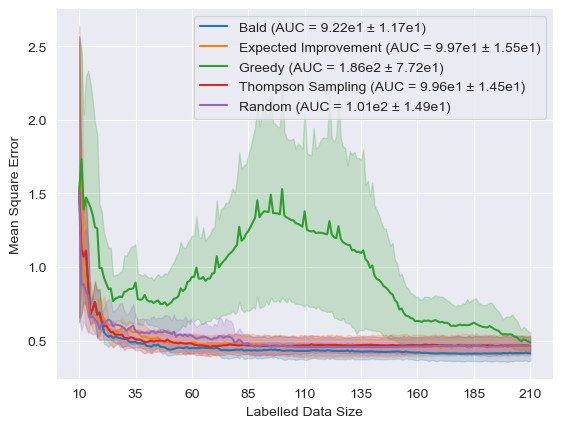

In [6]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Mean Square Error")
plt.xlabel("Labelled Data Size")


current_xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
legend.set_title(None) 
    

for spine in ax.spines.values():
    spine.set_visible(False)